# ***SVEASyHRD Prototype Model***
#### ***Date: Thu 01/11/2021***

1. $S$: Susceptible
2. $V$: Vaccinated
3. $E$: Exposed
4. $A$: Assymptomatic
5. $S_y$: Symptomatic
6. $H$: Hospitalised
7. $R$: Recovered
8. $D$: Deceased

### ***Differential Equations***

### $\frac{dS}{dt}= -[\beta_{A}\frac{A}{N}S + \beta_{S_y}\frac{S_y}{N}S] - vS$
### $\frac{dV}{dt}= v S$
### $\frac{dE}{dt}= \beta_{A}\frac{A}{N}S + \beta_{S_y}\frac{S_y}{N}S - \epsilon_A E - \epsilon_{Sy}E$
### $\frac{dA}{dt}= \epsilon_A E -\gamma_A A -aA$
### $\frac{dS_y}{dt}= \epsilon_{Sy}E +aA - hS_y -\gamma_{S_y}S_y$
### $\frac{dH}{dt}= hS_y - \gamma_h H -d_h H$
### $\frac{dR}{dt}= \gamma_A A + \gamma_{S_y} S_y + \gamma_h H$
### $\frac{dD}{dt}= d_h H$







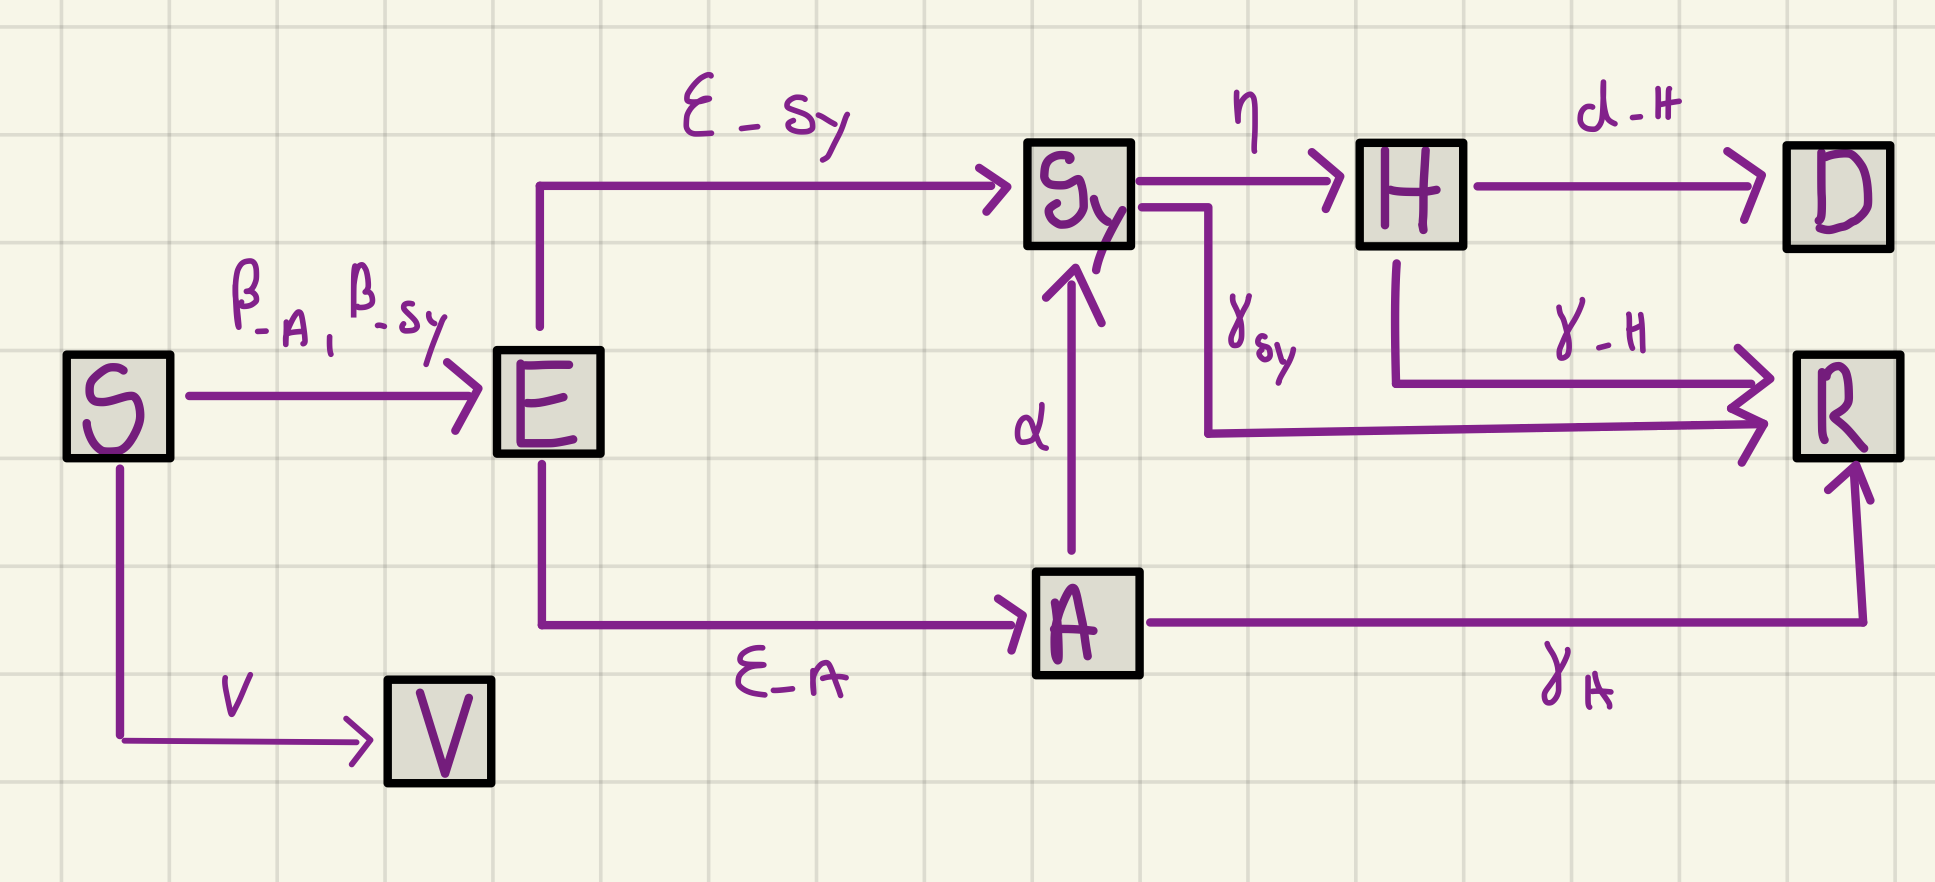

## **Model 1** ##
### Parameters - $ v = 0.1,\beta_{A}=\frac{3}{4}$, $\beta_{S_y}=\frac{2.5}{6.5}$, $\epsilon_A=\frac{1}{4}$, $\epsilon_{Sy}=\frac{1}{2}$, $\gamma_A=\frac{1}{4}$, $\gamma_{S_y}=\frac{1}{6.5}$, $a=\frac{1}{10}$, $h=0.024*\frac{1}{7}$, $d_h=0.6*\frac{1}{7}$, $\gamma_h=0.4*\frac{1}{7}$, $N=1000$, $E=15$, $A=10$, $Sy=5$, $H=0$, $R=0$, $D=0$ ###

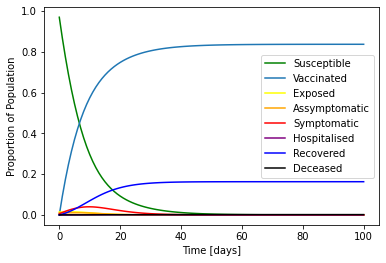

S[-1]= 0.0
V[-1]= 827.0
E[-1]= 0.0
A[-1]= -0.0
Sy[-1]= 0.0
H[-1]= 0.0
R[-1]= 161.0
D[-1]= 2.0


In [ ]:
#@title
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def sir_odes(t, x, v, b_a, b_sy, e_a, e_sy, g_a, g_sy, a, h, d_h, g_h):
    S = x[0]
    V = x[1]
    E = x[2]
    A = x[3]
    Sy = x[4]
    H = x[5]
    R = x[6]
    D = x[7]

    N = np.sum([S, V, E, A, Sy, H, R])

    dSdt = -(b_a/N)*A*S -(b_sy/N)*Sy*S - v*S
    dVdt =  v*S
    dEdt = (b_a/N)*A*S + (b_sy/N)*Sy*S - e_a*E - e_sy*E
    dAdt = e_a*E - g_a*A - a*A
    dSydt = e_sy*E - g_sy*Sy + a*A -h*Sy
    dHdt = h*Sy - g_h*H - d_h*H
    dRdt = g_a*A + g_sy*Sy + g_h*H
    dDdt = d_h*H

    return [dSdt,dVdt, dEdt, dAdt, dSydt, dHdt, dRdt, dDdt]

t_span = np.array([0, 100])  # Interval of integration (time limits)
t = np.linspace(t_span[0], t_span[1], t_span[1] + 1)  # Values of time
x_0 = [960, 0,15, 10, 5, 0, 0, 0]  # Initial conditions for model variables: S,V, E, A, Sy, H, R, D
args = (0.1, (3/4), (2.5/6.5), (1/4), (1/2), (1/4), (1/6.5), (1/10), (0.024*(1/7)), (0.6*(1/7)), (0.4*(1/7)))  # Arguments for our model parameters: v, b_a, b_sy, e_a, e_sy, g_a, g_sy, a, h, d_h, g_h

solutions = solve_ivp(sir_odes, t_span, x_0, args=args, t_eval=t)
S = solutions.y[0]
V = solutions.y[1]
E = solutions.y[2]
A = solutions.y[3]
Sy = solutions.y[4]
H = solutions.y[5]
R = solutions.y[6]
D = solutions.y[7]
N = S+V+E+A+Sy+H+R

plt.plot(t, S/N, label='Susceptible', color='green')
plt.plot(t, V/N, label='Vaccinated')
plt.plot(t, E/N, label='Exposed', color='yellow')
plt.plot(t, A/N, label='Assymptomatic', color='orange')
plt.plot(t, Sy/N, label='Symptomatic', color='red')
plt.plot(t, H/N, label='Hospitalised', color='purple')
plt.plot(t, R/N, label='Recovered', color='blue')
plt.plot(t, D/N, label='Deceased', color='black')
plt.xlabel('Time [days]')
plt.ylabel('Proportion of Population')
plt.legend()
plt.show()

print('S[-1]=', round(S[-1], 0))
print('V[-1]=', round(V[-1], 0))
print('E[-1]=', round(E[-1], 0))
print('A[-1]=', round(A[-1], 0))
print('Sy[-1]=', round(Sy[-1], 0))
print('H[-1]=', round(H[-1], 0))
print('R[-1]=', round(R[-1], 0))
print('D[-1]=', round(D[-1], 0))

---- 
## **Model 2** ##
### Parameters - $v = 0.01 ,\beta_{A}=\frac{3}{4}$, $\beta_{S_y}=\frac{2.5}{6.5}$, $\epsilon_A=\frac{1}{4}$, $\epsilon_{Sy}=\frac{1}{2}$, $\gamma_A=\frac{1}{4}$, $\gamma_{S_y}=\frac{1}{6.5}$, $a=\frac{1}{10}$, $h=0.24*\frac{1}{7}$, $d_h=0.6*\frac{1}{7}$, $\gamma_h=0.4*\frac{1}{7}$, $N=1000$, $E=15$, $A=10$, $Sy=5$, $H=0$, $R=0$, $D=0$ ###

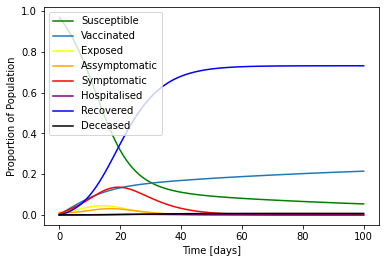

S[-1]= 53.0
V[-1]= 211.0
E[-1]= 0.0
A[-1]= 0.0
Sy[-1]= 0.0
H[-1]= 0.0
R[-1]= 719.0
D[-1]= 7.0


In [ ]:
#@title
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def sir_odes(t, x, v, b_a, b_sy, e_a, e_sy, g_a, g_sy, a, h, d_h, g_h):
    S = x[0]
    V = x[1]
    E = x[2]
    A = x[3]
    Sy = x[4]
    H = x[5]
    R = x[6]
    D = x[7]

    N = np.sum([S, V, E, A, Sy, H, R])

    dSdt = -(b_a/N)*A*S -(b_sy/N)*Sy*S - v*S
    dVdt =  v*S
    dEdt = (b_a/N)*A*S + (b_sy/N)*Sy*S - e_a*E - e_sy*E
    dAdt = e_a*E - g_a*A - a*A
    dSydt = e_sy*E - g_sy*Sy + a*A -h*Sy
    dHdt = h*Sy - g_h*H - d_h*H
    dRdt = g_a*A + g_sy*Sy + g_h*H
    dDdt = d_h*H

    return [dSdt,dVdt, dEdt, dAdt, dSydt, dHdt, dRdt, dDdt]

t_span = np.array([0, 100])  # Interval of integration (time limits)
t = np.linspace(t_span[0], t_span[1], t_span[1] + 1)  # Values of time
x_0 = [960, 0,15, 10, 5, 0, 0, 0]  # Initial conditions for model variables: S,V, E, A, Sy, H, R, D
args = (0.01, (3/4), (2.5/6.5), (1/4), (1/2), (1/4), (1/6.5), (1/10), (0.024*(1/7)), (0.6*(1/7)), (0.4*(1/7)))  # Arguments for our model parameters: v, b_a, b_sy, e_a, e_sy, g_a, g_sy, a, h, d_h, g_h

solutions = solve_ivp(sir_odes, t_span, x_0, args=args, t_eval=t)
S = solutions.y[0]
V = solutions.y[1]
E = solutions.y[2]
A = solutions.y[3]
Sy = solutions.y[4]
H = solutions.y[5]
R = solutions.y[6]
D = solutions.y[7]
N = S+V+E+A+Sy+H+R

plt.plot(t, S/N, label='Susceptible', color='green')
plt.plot(t, V/N, label='Vaccinated')
plt.plot(t, E/N, label='Exposed', color='yellow')
plt.plot(t, A/N, label='Assymptomatic', color='orange')
plt.plot(t, Sy/N, label='Symptomatic', color='red')
plt.plot(t, H/N, label='Hospitalised', color='purple')
plt.plot(t, R/N, label='Recovered', color='blue')
plt.plot(t, D/N, label='Deceased', color='black')
plt.xlabel('Time [days]')
plt.ylabel('Proportion of Population')
plt.legend()
plt.show()

print('S[-1]=', round(S[-1], 0))
print('V[-1]=', round(V[-1], 0))
print('E[-1]=', round(E[-1], 0))
print('A[-1]=', round(A[-1], 0))
print('Sy[-1]=', round(Sy[-1], 0))
print('H[-1]=', round(H[-1], 0))
print('R[-1]=', round(R[-1], 0))
print('D[-1]=', round(D[-1], 0))

# ***SVEASyHRD Prototype Model, vaccinated and recovered become suceptible***
#### ***Date: Thu 01/11/2021***

1. $S$: Susceptible
2. $V$: Vaccinated
3. $E$: Exposed
4. $A$: Assymptomatic
5. $S_y$: Symptomatic
6. $H$: Hospitalised
7. $R$: Recovered
8. $D$: Deceased

### ***Differential Equations***

### $\frac{dS}{dt}= -[\beta_{A}\frac{A}{N}S + \beta_{S_y}\frac{S_y}{N}S] - vS + v_bV + r_bR$
### $\frac{dV}{dt}= v S - v_bV$
### $\frac{dE}{dt}= \beta_{A}\frac{A}{N}S + \beta_{S_y}\frac{S_y}{N}S - \epsilon_A E - \epsilon_{Sy}E$
### $\frac{dA}{dt}= \epsilon_A E -\gamma_A A -aA$
### $\frac{dS_y}{dt}= \epsilon_{Sy}E +aA - hS_y -\gamma_{S_y}S_y$
### $\frac{dH}{dt}= hS_y - \gamma_h H -d_h H$
### $\frac{dR}{dt}= \gamma_A A + \gamma_{S_y} S_y + \gamma_h H - r_bR$
### $\frac{dD}{dt}= d_h H$

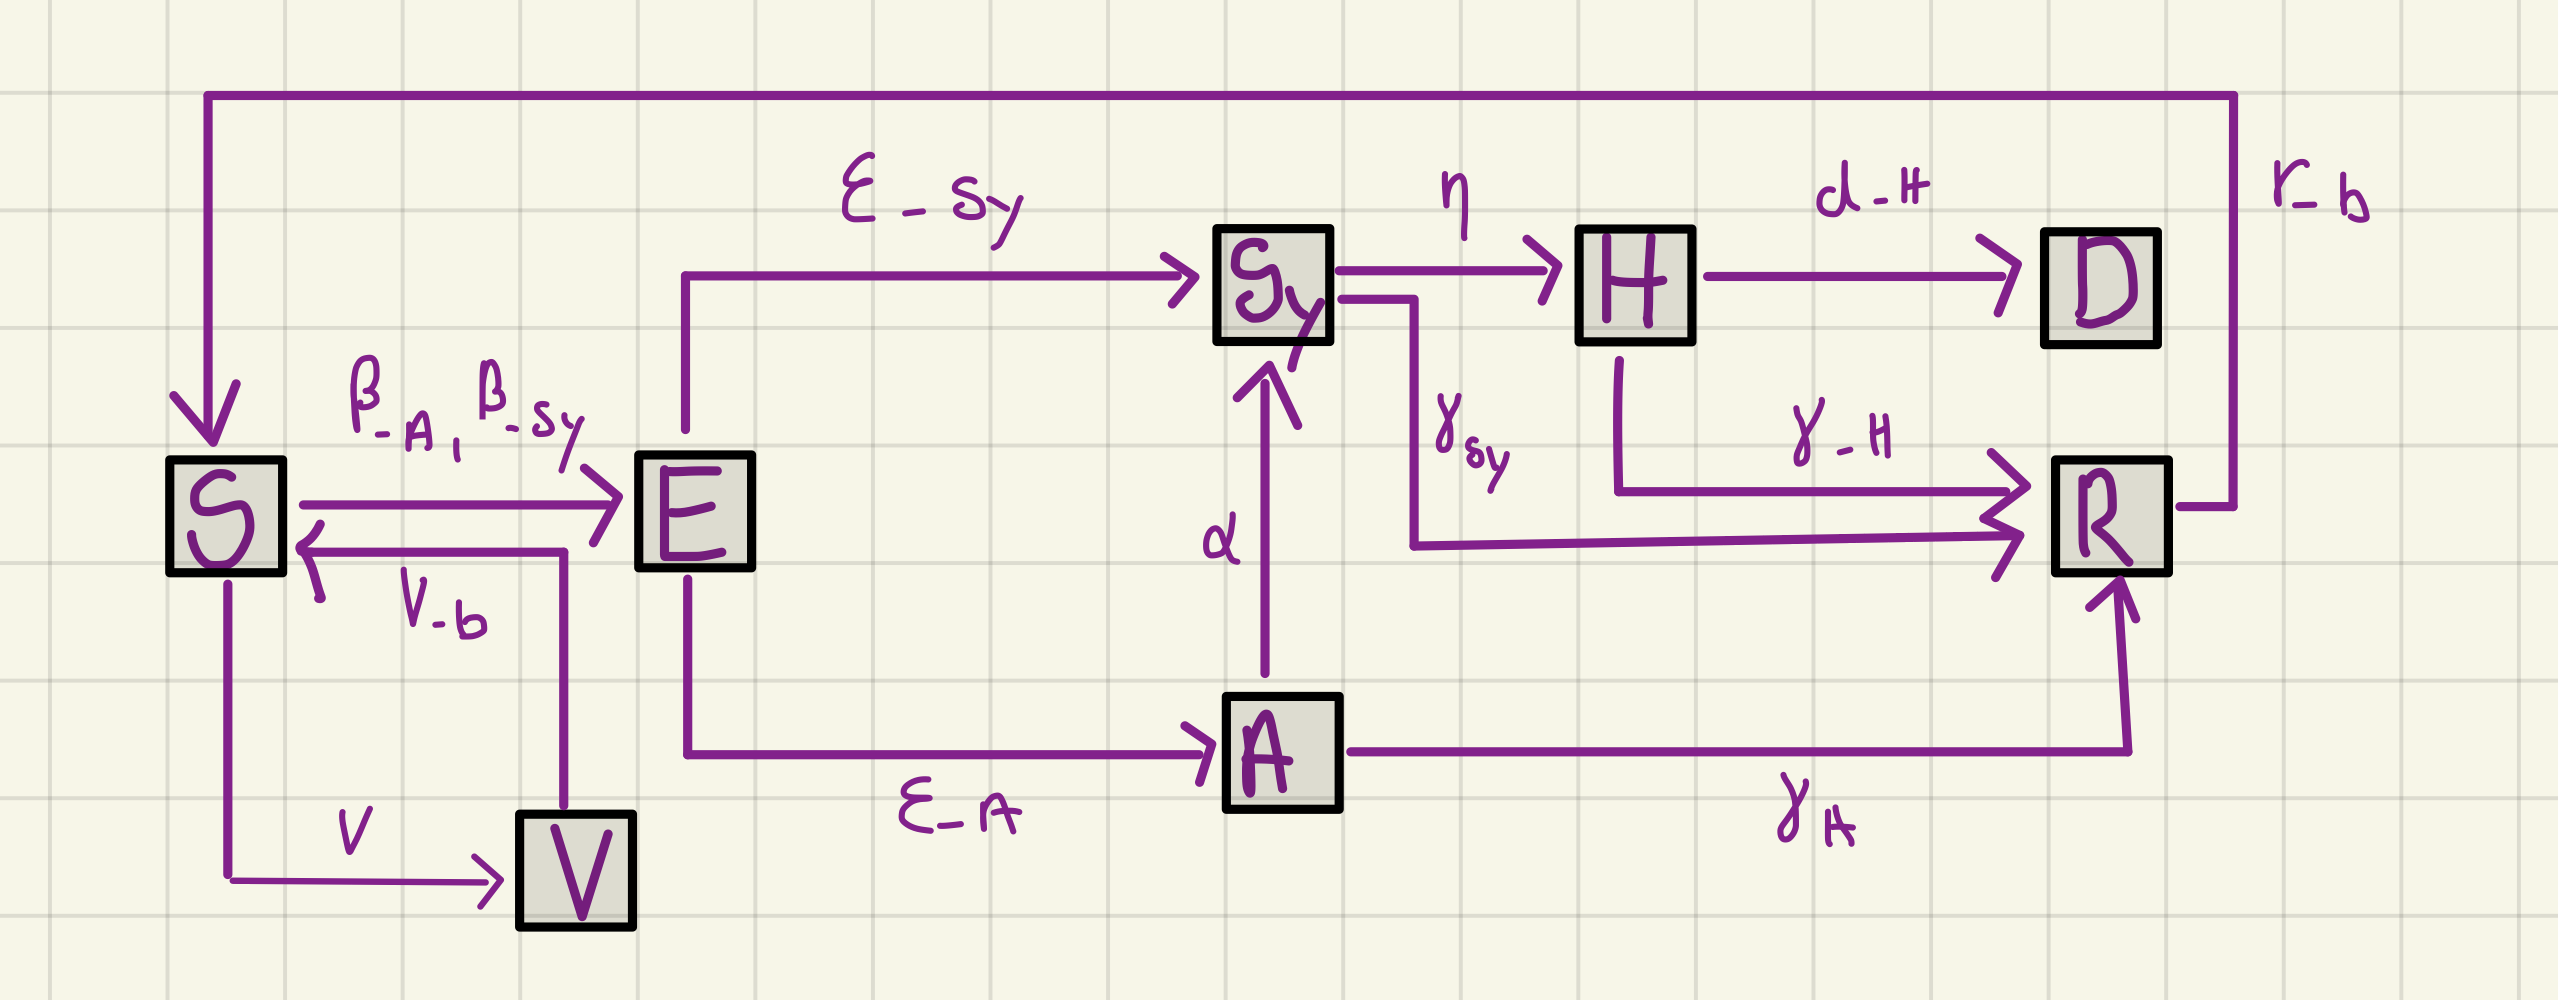

## **Model 1** ##
### Parameters - $ v = 0.1, v_b = 0.1,\beta_{A}=\frac{3}{4}$, $\beta_{S_y}=\frac{2.5}{6.5}$, $\epsilon_A=\frac{1}{4}$, $\epsilon_{Sy}=\frac{1}{2}$, $\gamma_A=\frac{1}{4}$, $\gamma_{S_y}=\frac{1}{6.5}$, $a=\frac{1}{10}$, $h=0.024*\frac{1}{7}$, $d_h=0.6*\frac{1}{7}$, $\gamma_h=0.4*\frac{1}{7}$, r_b = 0.1, $N=1000$, $E=15$, $A=10$, $Sy=5$, $H=0$, $R=0$, $D=0$ ###

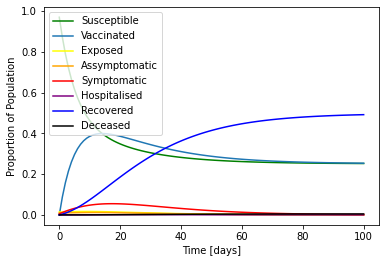

S[-1]= 248.0
V[-1]= 250.0
E[-1]= 0.0
A[-1]= 0.0
Sy[-1]= 2.0
H[-1]= 0.0
R[-1]= 485.0
D[-1]= 5.0


In [6]:
#@title
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def sir_odes(t, x, v, v_b, b_a, b_sy, e_a, e_sy, g_a, g_sy, a, h, d_h, g_h, r_b):
    S = x[0]
    V = x[1]
    E = x[2]
    A = x[3]
    Sy = x[4]
    H = x[5]
    R = x[6]
    D = x[7]

    N = np.sum([S, V, E, A, Sy, H, R])

    dSdt = -(b_a/N)*A*S -(b_sy/N)*Sy*S - v*S + v_b*V #+ r_b*R
    dVdt =  v*S - v_b*V
    dEdt = (b_a/N)*A*S + (b_sy/N)*Sy*S - e_a*E - e_sy*E
    dAdt = e_a*E - g_a*A - a*A
    dSydt = e_sy*E - g_sy*Sy + a*A -h*Sy
    dHdt = h*Sy - g_h*H - d_h*H
    dRdt = g_a*A + g_sy*Sy + g_h*H #- r_b*R
    dDdt = d_h*H

    return [dSdt,dVdt, dEdt, dAdt, dSydt, dHdt, dRdt, dDdt]

t_span = np.array([0, 100])  # Interval of integration (time limits)
t = np.linspace(t_span[0], t_span[1], t_span[1] + 1)  # Values of time
x_0 = [960, 0,15, 10, 5, 0, 0, 0]  # Initial conditions for model variables: S,V, E, A, Sy, H, R, D
args = (0.1,0.1, (3/4), (2.5/6.5), (1/4), (1/2), (1/4), (1/6.5), (1/10), (0.024*(1/7)), (0.6*(1/7)), (0.4*(1/7)), 0.1)  # Arguments for our model parameters: v, b_a, b_sy, e_a, e_sy, g_a, g_sy, a, h, d_h, g_h

solutions = solve_ivp(sir_odes, t_span, x_0, args=args, t_eval=t)
S = solutions.y[0]
V = solutions.y[1]
E = solutions.y[2]
A = solutions.y[3]
Sy = solutions.y[4]
H = solutions.y[5]
R = solutions.y[6]
D = solutions.y[7]
N = S+V+E+A+Sy+H+R

plt.plot(t, S/N, label='Susceptible', color='green')
plt.plot(t, V/N, label='Vaccinated')
plt.plot(t, E/N, label='Exposed', color='yellow')
plt.plot(t, A/N, label='Assymptomatic', color='orange')
plt.plot(t, Sy/N, label='Symptomatic', color='red')
plt.plot(t, H/N, label='Hospitalised', color='purple')
plt.plot(t, R/N, label='Recovered', color='blue')
plt.plot(t, D/N, label='Deceased', color='black')
plt.xlabel('Time [days]')
plt.ylabel('Proportion of Population')
plt.legend()
plt.show()

print('S[-1]=', round(S[-1], 0))
print('V[-1]=', round(V[-1], 0))
print('E[-1]=', round(E[-1], 0))
print('A[-1]=', round(A[-1], 0))
print('Sy[-1]=', round(Sy[-1], 0))
print('H[-1]=', round(H[-1], 0))
print('R[-1]=', round(R[-1], 0))
print('D[-1]=', round(D[-1], 0))

# ***SVEASyHRD Prototype Model, vaccinated become ill ***
#### ***Date: Thu 01/11/2021***

1. $S$: Susceptible
2. $V$: Vaccinated
3. $E$: Exposed
4. $A$: Assymptomatic
5. $S_y$: Symptomatic
6. $H$: Hospitalised
7. $R$: Recovered
8. $D$: Deceased

### ***Differential Equations***

### $\frac{dS}{dt}= -[\beta_{A}\frac{A}{N}S + \beta_{S_y}\frac{S_y}{N}S] - vS$
### $\frac{dV}{dt}= v S - v_{S_y}V - v_AV$
### $\frac{dE}{dt}= \beta_{A}\frac{A}{N}S + \beta_{S_y}\frac{S_y}{N}S - \epsilon_A E - \epsilon_{Sy}E$
### $\frac{dA}{dt}= \epsilon_A E +  v_AV -\gamma_A A -aA$
### $\frac{dS_y}{dt}= \epsilon_{Sy}E +aA + v_{S_y}V - hS_y -\gamma_{S_y}S_y$
### $\frac{dH}{dt}= hS_y - \gamma_h H -d_h H$
### $\frac{dR}{dt}= \gamma_A A + \gamma_{S_y} S_y + \gamma_h H$
### $\frac{dD}{dt}= d_h H$

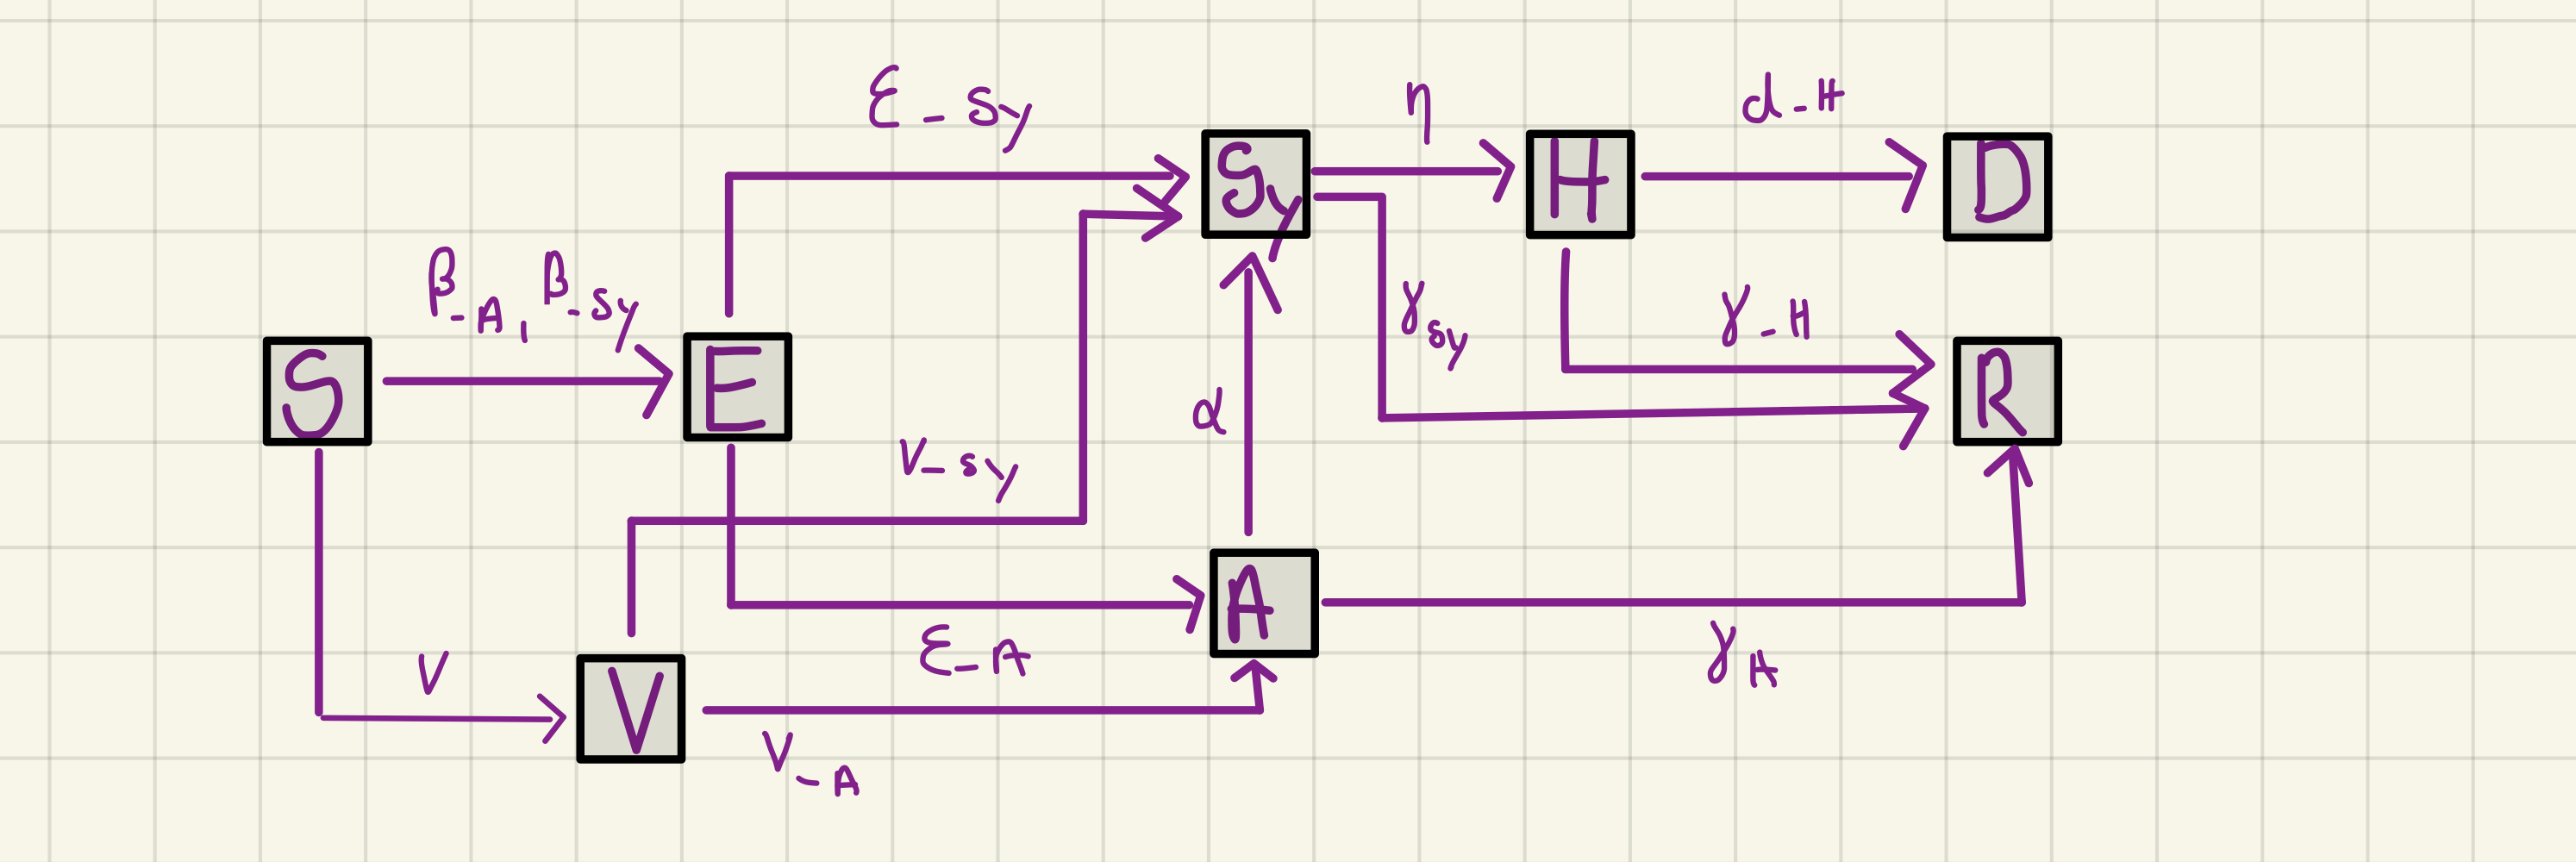

## **Model 1** ##
### Parameters - $ v = 0.1, v_{S_y} = 0.1, v_A = 0.05,\beta_{A}=\frac{3}{4}$, $\beta_{S_y}=\frac{2.5}{6.5}$, $\epsilon_A=\frac{1}{4}$, $\epsilon_{Sy}=\frac{1}{2}$, $\gamma_A=\frac{1}{4}$, $\gamma_{S_y}=\frac{1}{6.5}$, $a=\frac{1}{10}$, $h=0.024*\frac{1}{7}$, $d_h=0.6*\frac{1}{7}$, $\gamma_h=0.4*\frac{1}{7}$, $N=1000$, $E=15$, $A=10$, $Sy=5$, $H=0$, $R=0$, $D=0$ ###

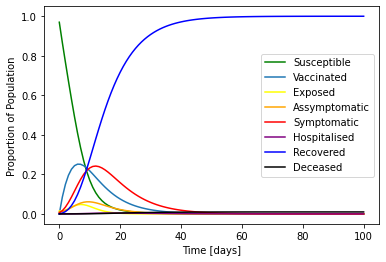

S[-1]= 0.0
V[-1]= 0.0
E[-1]= 0.0
A[-1]= 0.0
Sy[-1]= 0.0
H[-1]= 0.0
R[-1]= 980.0
D[-1]= 10.0


In [ ]:
#@title
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def sir_odes(t, x, v, v_sy,v_a, b_a, b_sy, e_a, e_sy, g_a, g_sy, a, h, d_h, g_h):
    S = x[0]
    V = x[1]
    E = x[2]
    A = x[3]
    Sy = x[4]
    H = x[5]
    R = x[6]
    D = x[7]

    N = np.sum([S, V, E, A, Sy, H, R])

    dSdt = -(b_a/N)*A*S -(b_sy/N)*Sy*S - v*S
    dVdt =  v*S - v_sy*V - v_a*V
    dEdt = (b_a/N)*A*S + (b_sy/N)*Sy*S - e_a*E - e_sy*E
    dAdt = e_a*E - g_a*A - a*A + v_a*V
    dSydt = e_sy*E - g_sy*Sy + a*A -h*Sy + v_sy*V
    dHdt = h*Sy - g_h*H - d_h*H
    dRdt = g_a*A + g_sy*Sy + g_h*H
    dDdt = d_h*H

    return [dSdt,dVdt, dEdt, dAdt, dSydt, dHdt, dRdt, dDdt]

t_span = np.array([0, 100])  # Interval of integration (time limits)
t = np.linspace(t_span[0], t_span[1], t_span[1] + 1)  # Values of time
x_0 = [960, 0,15, 10, 5, 0, 0, 0]  # Initial conditions for model variables: S,V, E, A, Sy, H, R, D
args = (0.1, 0.1, 0.05 ,(3/4), (2.5/6.5), (1/4), (1/2), (1/4), (1/6.5), (1/10), (0.024*(1/7)), (0.6*(1/7)), (0.4*(1/7)))  # Arguments for our model parameters: v,v_sy, v_a, b_a, b_sy, e_a, e_sy, g_a, g_sy, a, h, d_h, g_h

solutions = solve_ivp(sir_odes, t_span, x_0, args=args, t_eval=t)
S = solutions.y[0]
V = solutions.y[1]
E = solutions.y[2]
A = solutions.y[3]
Sy = solutions.y[4]
H = solutions.y[5]
R = solutions.y[6]
D = solutions.y[7]
N = S+V+E+A+Sy+H+R

plt.plot(t, S/N, label='Susceptible', color='green')
plt.plot(t, V/N, label='Vaccinated')
plt.plot(t, E/N, label='Exposed', color='yellow')
plt.plot(t, A/N, label='Assymptomatic', color='orange')
plt.plot(t, Sy/N, label='Symptomatic', color='red')
plt.plot(t, H/N, label='Hospitalised', color='purple')
plt.plot(t, R/N, label='Recovered', color='blue')
plt.plot(t, D/N, label='Deceased', color='black')
plt.xlabel('Time [days]')
plt.ylabel('Proportion of Population')
plt.legend()
plt.show()

print('S[-1]=', round(S[-1], 0))
print('V[-1]=', round(V[-1], 0))
print('E[-1]=', round(E[-1], 0))
print('A[-1]=', round(A[-1], 0))
print('Sy[-1]=', round(Sy[-1], 0))
print('H[-1]=', round(H[-1], 0))
print('R[-1]=', round(R[-1], 0))
print('D[-1]=', round(D[-1], 0))